# Test on Hidua with dropdown menu and multithreading
env = Python (codon)

# Imports


In [1]:
import os
import pygad
from multiprocessing import Pool

cwd = os.getcwd()
pygad_loc = '/grid/home/nbourgeois/codonOpt'
os.chdir(pygad_loc)
from general_functions import *
from metrics import *
os.chdir(cwd)

Using TensorFlow backend.


# Variables

In [2]:
ga_input = '/grid/home/nbourgeois/data/test_proteins/hidua/hidua.pep.fas' #sequence pep.fas Input
output = '' #output filename
dropdown = tissue_opt(pygad_loc) # Tissue type for CoCoPuts
dropdown
# Pick Brain_Cerebellum

Dropdown(description='Tissue:', index=53, options=('Adipose_Subcutaneous', 'Adipose_Visceral_Omentum', 'Adrena…

## Metrics

In [3]:
cai_on = True
bai_on = True
cpg_on = True

## PyGAD

# Start

## Parameters

### Weights

In [4]:
cai_w = 1 *cai_on
bai_w = 1 *bai_on
cpg_w = 1 *cpg_on

In [5]:
global total_weight
total_weight = sum([cai_w,bai_w,cpg_w])

### Locations

In [6]:
tissue = dropdown.value
cai_weight_dict = get_codon_weights(tissue)
bai_weight_dict = get_bicodon_weights(tissue)

# Algorithm

### Read in File

In [7]:
(keys, seqs) = readFasta(ga_input)
if len(seqs) == 1:
    aa_seq=str(seqs[0])

### Initialize Parameters
- gene_space
- codon_to_int dictionary

In [8]:
global codon_to_int

codon_to_int, gene_space = init_parameters(aa_seq)
    
gene_space_int = [[codon_to_int[x] for x in y] for y in gene_space]

# Fitness Function

In [9]:
def fitness_func(solution, solution_idx):
    
    global all_sols
    
    if not type(solution) is str:
        seq_aa = ''.join([codon_to_int[x] for x in solution])
    else:
        seq_aa = solution
#     print(solution_idx)

    tmp_dict = {}
    
    #Check for redundancy
    if seq_aa in all_sols.keys():
        fitness = all_sols[seq_aa]['fitness']

    else:
        fitness = 0
        
        if cai_on:
            cai = get_cai(seq_aa, cai_weight_dict)
            fitness += cai*cai_w
            tmp_dict['cai'] = cai
        
        if bai_on:
            bai = get_bai(seq_aa, bai_weight_dict)
            fitness += bai*bai_w
            tmp_dict['bai'] = bai
            
        if cpg_on:
            cpg = get_cpg(seq_aa)
            fitness += cpg*cpg_w
            tmp_dict['cpg'] = cpg

        fitness = fitness/total_weight
        tmp_dict['fitness'] = fitness
        all_sols[seq_aa] = tmp_dict
        
    
    return fitness

    

# Genetic Algorithm

In [10]:
"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

# def convert_aa_int():
    
desired_output = 1 # Function output.
all_sols = {}

fitness_function = fitness_func

num_generations = 100 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 5 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "two_points" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 5 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

last_fitness = 0
num_genes = len(gene_space)

def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.

def fitness_wrapper(solution):
    return fitness_func(solution, 0)


class PooledGA(pygad.GA):

    def cal_pop_fitness(self):
        global pool
        pop_fitness = pool.map(fitness_wrapper, self.population)
        pop_fitness = np.array(pop_fitness)
        return pop_fitness

ga_instance = PooledGA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
#                        init_range_low=init_range_low,
#                        init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation,
                       gene_type=int,
                       gene_space=gene_space_int,
)


Started
ERROR! Session/line number was not unique in database. History logging moved to new session 1493
Generation = 1
Fitness    = 0.7049168698196447
Change     = 0.0
Generation = 2
Fitness    = 0.7049168698196447
Change     = 0.0
Generation = 3
Fitness    = 0.7049168698196447
Change     = 0.0
Generation = 4
Fitness    = 0.7049168698196447
Change     = 0.0
Generation = 5
Fitness    = 0.7049168698196447
Change     = 0.0
Generation = 6
Fitness    = 0.7049168698196447
Change     = 0.0
Generation = 7
Fitness    = 0.7049168698196447
Change     = 0.0
Generation = 8
Fitness    = 0.7049168698196447
Change     = 0.0
Generation = 9
Fitness    = 0.7054072130551402
Change     = 0.0004903432354954607
Generation = 10
Fitness    = 0.7054072130551402
Change     = 0.0
Generation = 11
Fitness    = 0.7054072130551402
Change     = 0.0
Generation = 12
Fitness    = 0.7087875400669136
Change     = 0.0033803270117733764
Generation = 13
Fitness    = 0.7087875400669136
Change     = 0.0
Generation = 14
Fitness

Parameters of the best solution : [11 53 39  5 58 37 58 46 45  5  7 45  2  7 45 34  7  7 44 44 37 38 14 45
 38 44 30 45 37 21  7 12 21 15 28 46 45 54 45  4 51 36  2 58 53  0 51 59
 33 40 62  0 48 37 37  7 36 21 33 23 44 28 23 16 13  3 57 51 29 22 22  5
 25  6 45 16 15 62 45 13 38 21 59 62  8 26 23 13 55 42 21 51  7  3 30  3
 15 40 41 55 61 57 42 61 58 62  4 32 17 24  1 42 21  7 29 61 16  4 28  4
  7 58 30 25 22  3  7 36 60  0 30  5 11 61 32 44 32 62 21  0 40 29  0 31
 28 27 23 22 15  0 30 51 26 29  4 15 32 32  7 45 59 53 17  9 61 58 17 63
  7 45 20 15 57 26 51 24  0 31 41 51 25 31 38 29 20 20 29  0 29 25 13 33
 11 40 11 23 61  1  7 25 17 16 28 44 49 34 30 61  7 55 44 45 32 39 45  6
 58  7 62 62 38 63 28 57  0 21 41 36 37 58 57 37  7 57 51 61  3  2 58 21
 48 20 28 62 42 25  1  1 43 62 31 46 62 12 59  7 29 17  8 32  7 21 59 26
 62 45 58 34 57  8 33  9  7 30 23 31 26 15 15 45 23 23  8 58 23  7  1 36
 27  0 44 28 40 37  9 16 24 28 30 44 29 38  6 12 61 51 32  4 38 22 38 51
 59 44 29 15 41 1

CPU times: user 1.58 s, sys: 309 ms, total: 1.89 s
Wall time: 2 s


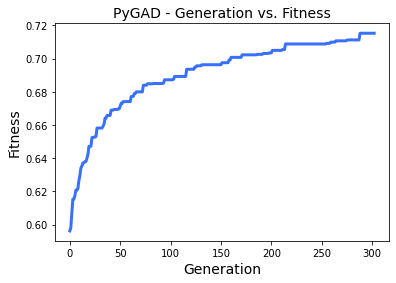

In [11]:
%%time

print('Started')
with Pool(processes=5) as pool:

    # Running the GA to optimize the parameters of the funcabstion.
    ga_instance.run()

    # After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
    ga_instance.plot_result()

    # Returning the details of the best solution.
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Parameters of the best solution : {solution}".format(solution=solution))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

    solution_aa = ''.join([codon_to_int[x] for x in solution])
   
    print("Predicted output based on the best solution : {prediction}".format(prediction=solution_aa))

#     if ga_instance_pool.best_solution_generation != -1:
#         print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

    # Saving the GA instance.
    ga_instance.save(filename=output)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=output)
loaded_ga_instance.plot_result()